# Testing Snowplow Algorithm

In [72]:
import os
# switch directories for import
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import initialize
import params
import pickle
from sectioning_streets import sectioning
from importlib import reload
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Autoreload documentation: https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html

For reloading user modules

In [2]:
toyEdgeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\edges.csv"
toyNodeFile = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\graph_data\\nodes.csv"

In [68]:
instance = "sectionedfullstreets"
polygon_path = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Data+Info\\GIS Data\\IndividualRoutes\\MiddletonRoute3-blue.gpkg"

match instance:
    case "smallstreets":
        G = initialize.create_small_streets()
    case "fullstreets":
        G = initialize.create_full_streets()
    case "smalltoy":
        G = initialize.create_small_toy(toyEdgeFile, toyNodeFile)
    case "sectionedfullstreets":
        G = sectioning.section_component(polygon_path)
    case _:
        print("Invalid instance name")
     

Update depot

In [69]:
if instance == "fullstreets" or instance == "sectionedfullstreets":
    params.DEPOT = params.find_depot(G)[0]
else:
    params.DEPOT = 0
params.DEPOT

113

Now reload all other modules for updated depot

In [59]:
os.chdir('c:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton')

import dual_graphs
import pandas as pd
import construction
import shortest_paths
import crossover
import osmnx as ox
import genetic 
import solution 
import costs 
import plotting
import local_search
import folium
import turns
import matplotlib.pyplot as plt
import folium.plugins
%load_ext autoreload
%autoreload 2

dual_graphs = reload(dual_graphs)
construction = reload(construction)
shortest_paths = reload(shortest_paths)
crossover = reload(crossover)
genetic = reload(genetic)
solution = reload(solution)
costs = reload(costs)
plotting = reload(plotting)
local_search = reload(local_search)

from shortest_paths import ShortestPaths
from crossover import apply_crossover
from genetic import run_genetic
from solution import Solution
from routes_representations import RouteStep, full_routes, full_routes_with_returns
from costs import routes_cost
from params import *
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
%reload_ext autoreload

In [70]:
approach = "genetic"

if approach == "genetic":
    G = initialize.add_multi_edges(G)
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, params.DEPOT)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G)

elif approach == "annealing":
    if instance == "smallstreets" or instance == "fullstreets" or instance == "sectionedfullstreets":
        G_DUAL = dual_graphs.create_dual_streets(G, False, True)
    else:
        G_DUAL = dual_graphs.create_dual_toy(G, False, True)



Adding depot source 113


In [71]:
print(G)
print(G_DUAL)

MultiDiGraph with 163 nodes and 605 edges
MultiDiGraph with 606 nodes and 3342 edges


In [22]:
print(G)
print(G_DUAL)

MultiDiGraph with 51 nodes and 140 edges
MultiDiGraph with 141 nodes and 452 edges


In [76]:
sp = ShortestPaths(G_DUAL, False, False)

In [79]:
r, rreq = construction.route_generation(G, sp, params.DEPOT)

In [25]:
for route in r:
    for routestep in route:
        print(routestep)
    print("***")


0 --> 41. (0) Salt value: 20000. Prev: None. Next: None. Route end: False
41 --> 1. (0) Salt value: 19998.0. Prev: (0, 41, 0). Next: None. Route end: False
1 --> 44. (0) Salt value: 19995.0. Prev: (41, 1, 0). Next: None. Route end: False
44 --> 45. (0) Salt value: 19993.0. Prev: (1, 44, 0). Next: None. Route end: False
45 --> 46. (0) Salt value: 19992.0. Prev: None. Next: None. Route end: False
46 --> 0. (0) Salt value: 19992.0. Prev: (44, 45, 0). Next: None. Route end: False
***
0 --> 41. (1) Salt value: 20000. Prev: (46, 0, 0). Next: None. Route end: False
41 --> 1. (1) Salt value: 19998.0. Prev: (0, 41, 1). Next: None. Route end: False
1 --> 44. (1) Salt value: 19995.0. Prev: (41, 1, 1). Next: None. Route end: False
44 --> 0. (0) Salt value: 19993.0. Prev: (1, 44, 1). Next: None. Route end: False
***
0 --> 20. (0) Salt value: 20000. Prev: (44, 0, 0). Next: None. Route end: False
20 --> 42. (0) Salt value: 19999.0. Prev: (0, 20, 0). Next: None. Route end: False
42 --> 41. (1) Salt va

In [26]:
for route in rreq:
    for routestep in route:
        print(routestep)
    print("**")

(0, 41, 0)
(41, 1, 0)
(1, 44, 0)
(44, 45, 0)
(46, 0, 0)
**
(0, 41, 1)
(41, 1, 1)
(1, 44, 1)
(44, 0, 0)
**
(0, 20, 0)
(20, 42, 0)
(42, 41, 1)
(44, 0, 1)
**
(42, 41, 0)
(46, 11, 0)
(11, 46, 0)
(46, 45, 0)
(11, 53, 0)
(53, 14, 1)
(14, 33, 1)
(33, 14, 1)
(14, 53, 0)
(53, 14, 0)
(14, 33, 0)
(33, 14, 0)
(14, 10, 0)
(10, 11, 0)
(11, 10, 0)
(10, 6, 0)
(6, 7, 0)
(7, 24, 0)
(24, 26, 0)
(26, 24, 0)
(24, 23, 0)
(23, 12, 0)
(12, 34, 0)
(34, 35, 0)
(35, 35, 0)
(35, 34, 0)
(34, 12, 0)
(12, 23, 0)
(23, 24, 0)
(24, 7, 0)
(7, 8, 0)
(8, 7, 0)
(7, 15, 0)
(15, 16, 0)
(16, 17, 0)
(17, 18, 0)
(18, 17, 0)
(17, 31, 0)
(31, 17, 0)
(17, 16, 0)
(16, 15, 0)
(15, 7, 0)
(24, 15, 0)
(15, 24, 0)
(23, 25, 0)
(25, 25, 0)
(25, 23, 0)
(6, 10, 0)
(10, 9, 0)
(9, 10, 0)
(10, 14, 0)
(14, 53, 1)
(53, 20, 1)
(53, 11, 0)
(53, 20, 0)
(14, 51, 0)
(51, 13, 0)
(13, 30, 0)
(30, 48, 0)
(48, 30, 0)
(30, 22, 0)
(22, 48, 0)
(48, 33, 0)
(33, 32, 1)
(32, 49, 0)
(49, 21, 0)
(21, 54, 0)
(54, 21, 0)
(21, 28, 0)
(28, 21, 0)
(21, 49, 0)
(49, 48

Test Local Search

In [27]:
required_edges = set(edge[:3] for edge in G.edges(data=True, keys=True) if edge[3]['priority'] != 0)
S_first = Solution(rreq, dict(), routes_cost(G, sp, rreq, params.DEPOT), 0)

print(routes_cost(G, sp, S_first.routes, params.DEPOT))

90330.55537000002


In [28]:
_, head = local_search.individual_to_linked_list(rreq, params.DEPOT)
print("Linked list costs:", costs.routes_cost_linked_list(G, sp, head, params.DEPOT))
print("Normal cost:", routes_cost(G, sp, rreq, params.DEPOT))

Linked list costs: 90330.55537000002
Normal cost: 90330.55537000002


In [29]:
S_new = local_search.local_improve(S_first, G, sp, required_edges, params.DEPOT, threshold=1)
print(routes_cost(G, sp, S_new.routes, params.DEPOT))
for route in S_new.routes:
    for routestep in route:
        print(routestep)
    print("***")

82001.55832499999
(0, 41, 0)
(41, 1, 0)
(44, 0, 1)
(1, 44, 1)
(42, 41, 0)
(44, 45, 0)
(46, 0, 0)
(0, 41, 1)
(41, 1, 1)
(44, 0, 0)
(0, 20, 0)
(53, 20, 0)
(42, 41, 1)
(1, 44, 0)
(46, 11, 0)
(6, 11, 0)
(46, 45, 0)
(11, 53, 0)
(53, 14, 1)
(14, 33, 1)
(33, 14, 1)
(14, 53, 0)
(53, 14, 0)
(14, 33, 0)
(33, 14, 0)
(14, 10, 0)
(10, 11, 0)
(11, 46, 0)
(53, 11, 0)
(11, 10, 0)
(6, 7, 0)
(24, 15, 0)
(15, 7, 0)
(24, 26, 0)
(47, 26, 0)
(26, 24, 0)
(24, 23, 0)
(23, 12, 0)
(12, 34, 0)
(34, 35, 0)
(35, 35, 0)
(35, 34, 0)
(34, 12, 0)
(12, 23, 0)
(23, 24, 0)
(24, 7, 0)
(7, 8, 0)
(8, 7, 0)
(7, 15, 0)
(15, 16, 0)
(16, 17, 0)
(17, 18, 0)
(18, 17, 0)
(17, 31, 0)
(31, 17, 0)
(17, 16, 0)
(16, 15, 0)
(15, 24, 0)
(23, 25, 0)
(25, 25, 0)
(25, 23, 0)
(6, 10, 0)
(10, 9, 0)
(10, 6, 0)
(6, 5, 0)
(36, 9, 0)
(10, 14, 0)
(14, 53, 1)
(53, 20, 1)
(20, 42, 0)
(14, 51, 0)
(51, 13, 0)
(13, 30, 0)
(30, 48, 0)
(22, 30, 0)
(30, 13, 0)
(48, 30, 0)
(30, 22, 0)
(22, 48, 0)
(48, 33, 0)
(33, 32, 1)
(32, 49, 0)
(28, 32, 0)
(9, 36, 0)
(

In [30]:
s1, s1req = construction.route_generation(G, sp, params.DEPOT)
S1 = Solution(s1req, dict(), routes_cost(G, sp, s1req, params.DEPOT), 0)
S1 = local_search.local_improve(S1, G, sp, required_edges, params.DEPOT, threshold=1)

s2, s2req = construction.route_generation(G, sp, params.DEPOT)
S2 = Solution(s2req, dict(), routes_cost(G, sp, s2req, params.DEPOT), 0)
S2 = local_search.local_improve(S2, G, sp, required_edges, params.DEPOT, threshold=1)

In [31]:
S0 = apply_crossover(G, sp, S1.routes, S2.routes, params.DEPOT)
# idea for crossover: don't crossover a whole subsection of routes, but rather a fixed chunk (say 20-30 routesteps) of a route. This would significantly improve computation speed

In [32]:
count0, count1, count2 = 0, 0, 0
for route in S0:
    for routestep in route:
        count0 += 1
for route in S1.routes:
    for routestep in route:
        count1 += 1
for route in S2.routes:
    for routestep in route:
        count2 += 1


print(count0, count1, count2)

125 125 125


In [77]:
# 4. Route Improvement Algorithms
sol = run_genetic(G, sp, params.DEPOT)

for route in sol.routes:
    for edge in route:
        print(edge)
    print("***")

initial generation 0
initial generation 1
initial generation 2
initial generation 3
initial generation 4
initial generation 5
initial generation 6
initial generation 7
initial generation 8
initial generation 9
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19
Iteration 20
Iteration 21
Iteration 22
Iteration 23
Iteration 24
(110, 111, 0)
(113, 110, 0)
(110, 111, 1)
(111, 113, 0)
(111, 110, 0)
(112, 114, 0)
(114, 124, 0)
(124, 125, 0)
(125, 111, 0)
(111, 110, 1)
(110, 112, 0)
(109, 108, 1)
(108, 88, 0)
(88, 108, 1)
(108, 109, 0)
(113, 109, 1)
(108, 109, 1)
(109, 113, 0)
(113, 109, 0)
(109, 108, 0)
(88, 108, 0)
(108, 107, 0)
(107, 108, 1)
(108, 107, 1)
(107, 108, 0)
(108, 88, 1)
(88, 87, 0)
(87, 147, 0)
(147, 63, 0)
(63, 59, 0)
(59, 56, 1)
(56, 55, 1)
(55, 54, 2)
(54, 55, 0)
(55, 54, 0)
(54, 

In [78]:
full_route = full_routes_with_returns(G, sp, sol.routes, params.DEPOT)
time_seconds = costs.route_travel_time(G, full_route, params.DEPOT)

In [80]:
first_full_route = full_routes_with_returns(G, sp, rreq, params.DEPOT)
time_seconds_first = costs.route_travel_time(G, first_full_route, params.DEPOT)
print("First route cost", routes_cost(G, sp, rreq, params.DEPOT))
print("First route travel time hours", time_seconds_first/3600)

First route cost 384063.00136893755
First route travel time hours 7.015089533375098


In [81]:
# Display costs and travel time
print("Routes cost", sol.cost)
print("Travel time hours", time_seconds/3600)

Routes cost 355610.7775602546
Travel time hours 8.264460781987747


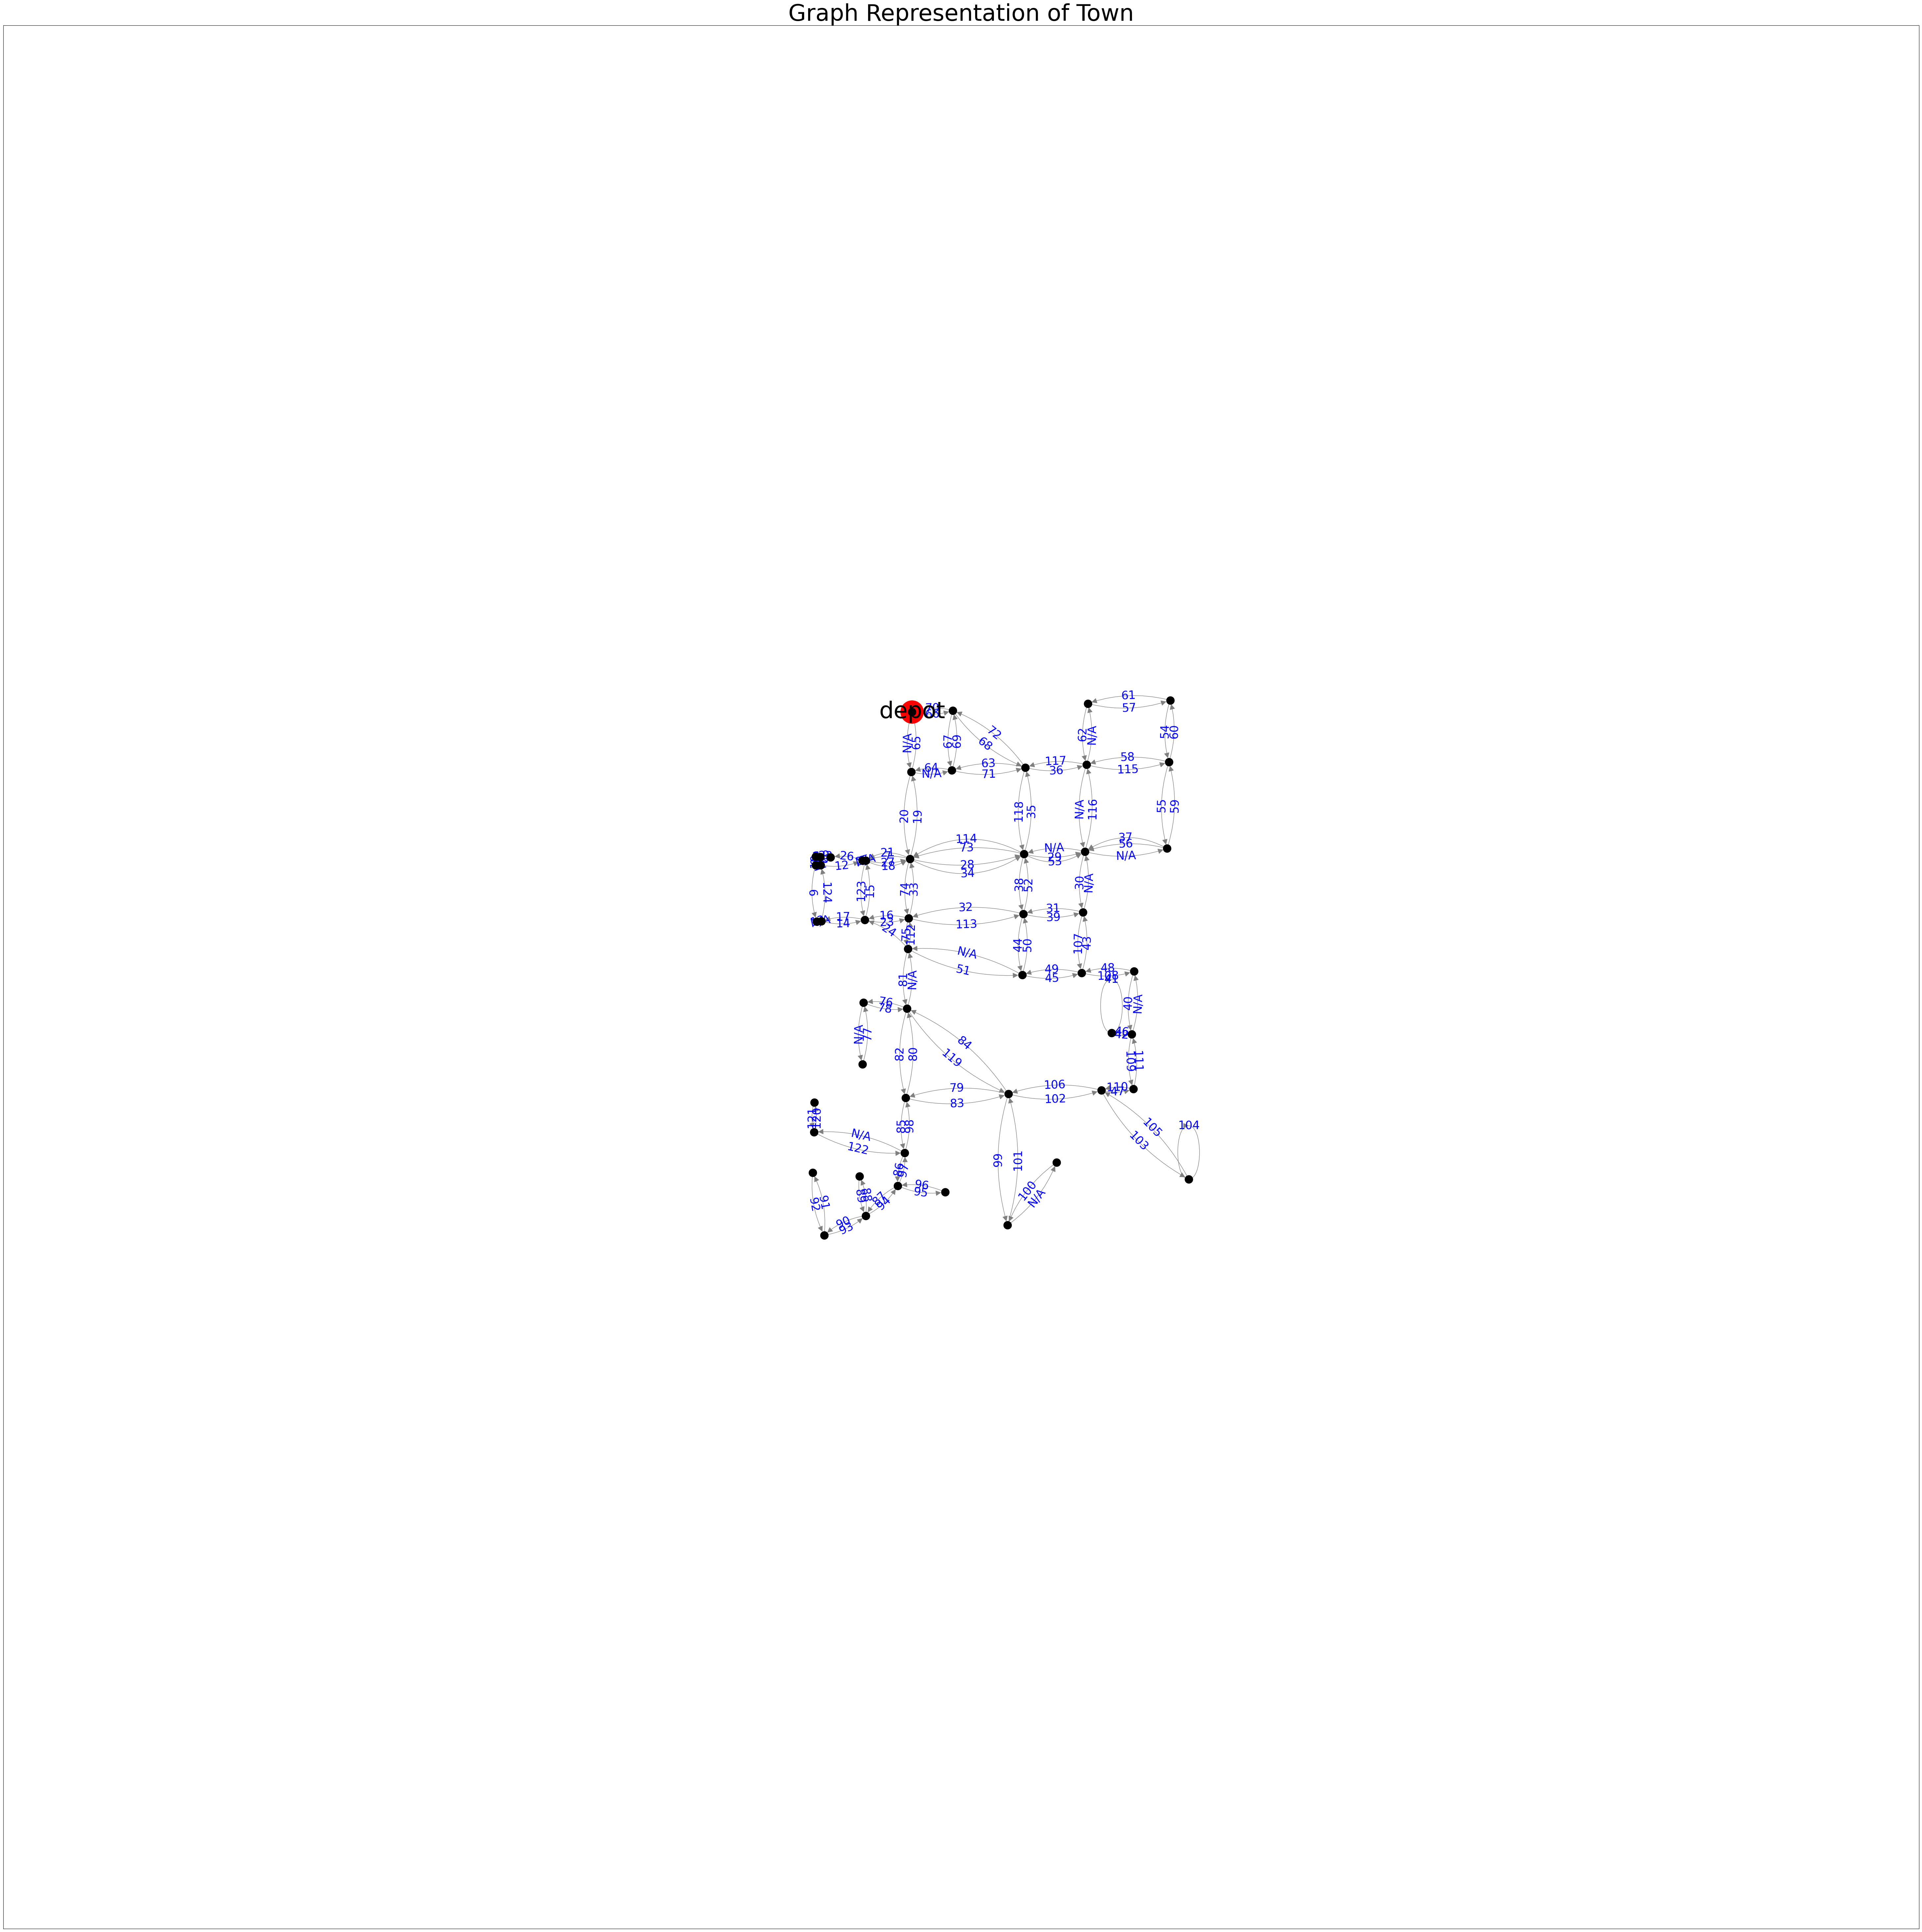

DONE


In [37]:
# 5. Plot final routes
G_graph = plotting.add_order_attribute(G, sol.routes)
plotting.draw_labeled_multigraph(G_graph, 'order', size=(75,75), plotDepot=True)

print("DONE")

## Comparing Turn Directions

In [73]:
blue_routes_filepath = "C:\\Users\\Sneez\\Desktop\\Snowplowing\\Snowplow-Routing-Middleton\\Snowplow-Routing-Middleton\\solutions\\routes_blue.pickle"

In [74]:
with open(blue_routes_filepath, 'rb') as f:
    blue_routes = pickle.load(f)

<BarContainer object of 6 artists>

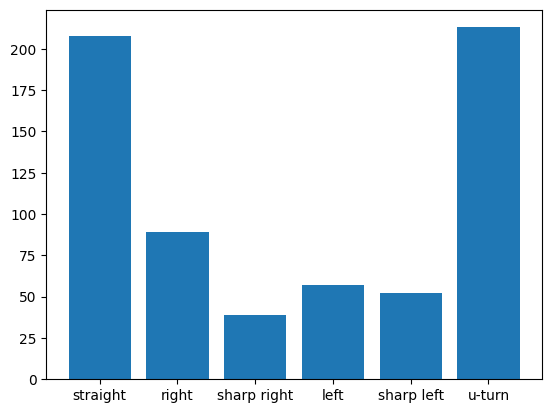

In [75]:
orig_turns_hist, orig_x_bins, orig_y_counts = turns.turn_direction_count(G_DUAL, blue_routes)
plt.bar(orig_x_bins, orig_y_counts)
plt.title("Turn counts on original graph with no weighted penalty for u-turns")

<BarContainer object of 6 artists>

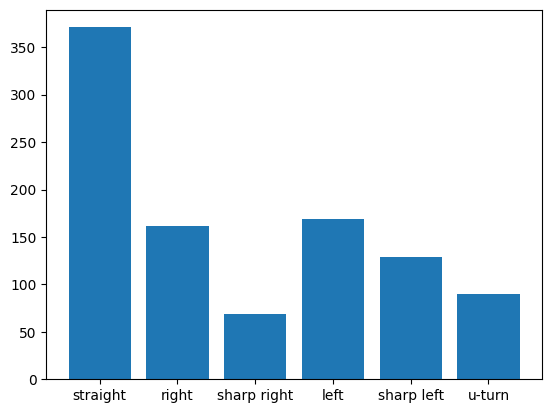

In [82]:
turns_hist, x_bins, y_counts = turns.turn_direction_count(G_DUAL, full_route)
plt.bar(x_bins, y_counts)

## Plot the routes using Folium

In [83]:
plotting.plot_moving_routes_folium(G, full_route, None, "blue", "blue")